In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## 1.1 Метод дихотомии

**Дихотомия** — раздвоенность, последовательное деление на две части, более связанные внутри, чем между собой. Способ логического деления класса на подклассы, который состоит в том, что делимое понятие полностью делится на два взаимоисключающих понятия. Дихотомическое деление в математике, философии, логике и лингвистике является способом образования подразделов одного понятия или термина и служит для образования классификации элементов.

**Метод дихотомии**
Пусть задана функция  $f(x):\;[a,\;b]\to\mathrm{R},\;f(x)\in\mathrm{C}([a,\;b]) $.

Разобьём мысленно заданный отрезок пополам и возьмём две симметричные относительно центра точки  $x_1 $ и  $x_2 $ так, что:
:  $$\begin{array}{ccc}
x_1 = \frac{a+b}{2}-\delta,\\
x_2 = \frac{a+b}{2}+\delta,
\end{array} $$
где  $\delta $ — некоторое число в интервале  $\left(0,\;\frac{b-a}{2}\right) $.

Вычислим два значения функции  $f(x) $ в двух новых точках. Сравнением определим в какой из двух новых точек значение функции  $f(x) $ максимально.
Отбросим тот из концов изначального отрезка, к которому точка с максимальным значением функции оказалась ближе (напомним, мы ищем минимум), то есть:
* Если  $f(x_1)>f(x_2) $, то берётся отрезок  $[x_1,\;b] $, а отрезок  $[a,\;x_1] $ отбрасывается.
* Иначе берётся зеркальный относительно середины отрезок  $[a,\;x_2] $, а отбрасывается  $[x_2,\;b] $.

Процедура повторяется, пока не будет достигнута заданная точность, к примеру, пока длина отрезка не достигнет удвоенного значения заданной погрешности.


Итерация: 1
	 y: 1.975 z: 2.025
	 f(y): 2.339757705558531 f(z): 2.3441450263257324
	 a: 1 b: 2.025
Итерация: 2
	 y: 1.4875 z: 1.5374999999999999
	 f(y): 2.355773196866529 f(z): 2.346477383134929
	 a: 1.4875 b: 2.025
Итерация: 3
	 y: 1.7312500000000002 z: 1.78125
	 f(y): 2.3306316446283204 f(z): 2.330446674618447
	 a: 1.7312500000000002 b: 2.025
Итерация: 4
	 y: 1.8531250000000001 z: 1.903125
	 f(y): 2.332243753602884 f(z): 2.3347196361553704
	 a: 1.7312500000000002 b: 1.903125
Итерация: 5
	 y: 1.7921875000000003 z: 1.8421875
	 f(y): 2.330571990875466 f(z): 2.331828770379085
	 a: 1.7312500000000002 b: 1.8421875
Итерация: 6
	 y: 1.7617187500000002 z: 1.81171875
	 f(y): 2.330366695737431 f(z): 2.3309330702069566
	 a: 1.7312500000000002 b: 1.81171875

	 X_min: 1.771484375 	 F_min: 2.330383195475999


<IPython.core.display.Javascript object>


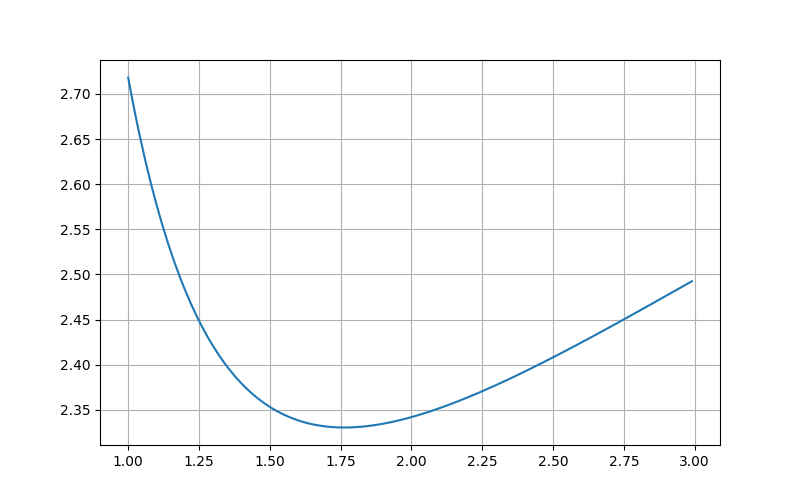

In [11]:
def func(x):
    return np.exp(1 / x) + np.log(x)

a = 1
b = 3
eps = 0.05

def dihotomii(f, a, b, eps):
    k = 1
    while True:
        y = (a + b - eps) / 2
        z = (a + b + eps) / 2   
        
        print("Итерация:", k)
        print("\t", "y:", y, "z:", z)
        print("\t", "f(y):", f(y), "f(z):", f(z))
        
        if f(y) <= f(z):
            b = z
        else:
            a = y
        
        print("\t", "a:", a, "b:", b)
        
        if abs(b - a) <= eps * 2:
            return (a + b) / 2
        
        k += 1        
        
solve = dihotomii(func, a, b, eps)
print("\n\t", "X_min:", solve, "\t", "F_min:", func(solve))

x = np.arange(a, b, 0.01)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, func(x))
ax.grid(True)

## 1.2 Метод золотого сечения

**Метод золотого сечения** — метод поиска экстремума действительной функции одной переменной на заданном отрезке. В основе метода лежит принцип деления отрезка в пропорциях золотого сечения. Является одним из простейших вычислительных методов решения задач оптимизации. Впервые представлен Джеком Кифером в 1953 году.

**Алгоритм**
1. На первой итерации заданный отрезок делится двумя симметричными относительно его центра точками и рассчитываются значения в этих точках.
2. После чего тот из концов отрезка, к которому среди двух вновь поставленных точек ближе оказалась та, значение в которой максимально (для случая поиска минимума), отбрасывают.
3. На следующей итерации в силу показанного выше свойства золотого сечения уже надо искать всего одну новую точку.
4. Процедура продолжается до тех пор, пока не будет достигнута заданная точность.

**Формализация**
1.  Задаются начальные границы отрезка $a,\;b$ и точность $\varepsilon$. 
2.  Рассчитывают начальные точки деления: $x_1 = b-\frac{(b-a)}{\Phi},\quad x_2 = a+\frac{(b-a)}{\Phi}$ и значения в них целевой функции: $y_1=f(x_1),\;y_2=f(x_2)$.
    - Если $y_1 \ge y_2$ (для поиска max изменить неравенство на $y_1 \le y_2$), то $ a=x_1$
    - Иначе $b=x_2$.
3. 
     - Если $|b-a|<\varepsilon$, то $x=\frac{a+b}{2}$ и останов.
     - Иначе возврат к шагу 2.

In [12]:
def zolotogo_secheniya(f, a, b, eps, verbose=False):
    y = a + (3 - np.sqrt(5)) * (b - a) / 2
    z = a + b - y 
    
    if verbose:
        print("Начало")
        print("\t", "y:", y, "z:", z)
        print("-" * 60)
    
    k = 1
    while True:
        if verbose:
            print ("Итерация", k)
            print("\t", "f(y):", f(y), "f(z):", f(z))
            
        if f(y) <= f(z):
            b = z
            z = y
            y = a + b - y
        else:
            a = y
            y = z
            z = a + b - z
            
        if verbose:
            print("\t", "y:", y, "z:", z, "a:", a, "b:", b)
        
        if abs(b - a) <= eps * 2:
            return (a + b) / 2
        
        k += 1
        
solve = zolotogo_secheniya(func, a, b, eps, verbose=True)
print("\n\t", "X_min:", solve, "\t", "F_min:", func(solve))

Начало
	 y: 1.7639320225002102 z: 2.23606797749979
------------------------------------------------------------
Итерация 1
	 f(y): 2.3303662514394228 f(z): 2.3686672721524227
	 y: 1.4721359549995796 z: 1.7639320225002102 a: 1 b: 2.23606797749979
Итерация 2
	 f(y): 2.359181462100523 f(z): 2.3303662514394228
	 y: 1.7639320225002102 z: 1.9442719099991592 a: 1.4721359549995796 b: 2.23606797749979
Итерация 3
	 f(y): 2.3303662514394228 f(z): 2.337407368358798
	 y: 1.6524758424985286 z: 1.7639320225002102 a: 1.4721359549995796 b: 1.9442719099991592
Итерация 4
	 f(y): 2.333806294955805 f(z): 2.3303662514394228
	 y: 1.7639320225002102 z: 1.8328157299974777 a: 1.6524758424985286 b: 1.9442719099991592
Итерация 5
	 f(y): 2.3303662514394228 f(z): 2.331511710041314
	 y: 1.721359549995796 z: 1.7639320225002102 a: 1.6524758424985286 b: 1.8328157299974777
Итерация 6
	 f(y): 2.330825638787198 f(z): 2.3303662514394228
	 y: 1.7639320225002102 z: 1.7902432574930636 a: 1.721359549995796 b: 1.832815729997477

## 2.1 Метод сопряженных направлений

**Алгоритм**
1. Задать начальную точку $х^0$, число $\varepsilon >0$ для окончания алгоритма, начальные направления поиска

$$d_1=\begin{pmatrix}
1\\ 
0\\
\vdots \\  
0\\ 
\end{pmatrix}
,
d_2=\begin{pmatrix}
0\\ 
1\\
\vdots \\  
0\\ 
\end{pmatrix}
...
d_n=\begin{pmatrix}
0\\ 
0\\
\vdots \\  
1\\ 
\end{pmatrix}$$

Положим $d_0=d_n, i=0, y^0=x^0, k=0$.
2. Найти $y^{i+1}=y^i+t_i d_i$, где шаг $t_i$ находится в результате поиска минимума функции $f(y^i+t_i d_i)$ по $t_i$ одним из методов одномерной минимизации.
3. Проверить выполнение условий:
    - если $i<n-1$, положить $i=i+1$ и перейти к шагу 2;
    - если $i=n-1$, проверить успешность поиска по $n$ первым направлениям. Если $y^n=y^0$, то поиск завершить: $х^* \cong  у^n$, иначе положить$i=i+1$ и перейти к шагу 2;
    - если $i=n$, проверить успешность поиска по $n$ последним направлениям. Если $y^{n+1}=y^1$, поиск завершить:  $х^* \cong  у^n$, иначе перейти к шагу 4 для построения сопряженного направления.
4. Положить $x^{k+1}=y^{n+1}$ и проверить условие окончания:
    - если $\left \| x^{k+1}-x^k  \right \| < \varepsilon $, то поиск завершить:$х^* \cong  x^{k+1}$
    - иначе положить: $\bar{d_0}=\bar{d_n}=\bar{d^{n+1}}-y^1$ (новое направление); $\bar{d_i}=d_{i+1},\:\:   i=1,...,n-1$ (исключается старое направление). <br/>
    Если при этом $rang(\bar{d_1}, ...,\bar{d_n} )=n$, то новая система направлений линейно независима. В этом случае положить: $$\bar{d_i}=d_i, i=0,1,...,n;k=k+1, i=0, y^0=x^{k+1}$$ и к шагу 2. <br/><br/>
    Если $rang(\bar{d_1}, ...,\bar{d_n} )<n$, то новая система направлений линейно зависима. Тогда следует продолжать поиск в старых направлениях. Для этого положить: $$d_i=d_i, i=0,1,...,n;\: y^0=x^{k+1},k=k+1$$ и перейти к шагу 2.


Итерация: 1
	 y0: (1, 1)
	 y1: [1.         0.99966776] 	 t0: -0.0003322413967907778
	 y2: [0.49987372 0.99966776] 	 t1: -0.5001262829182451
	 y3: [0.49987372 1.24969181] 	 t2: 0.25002404642782494
Итерация: 2
	 y0: [0.49987372 1.24969181]
	 y1: [0.49987372 1.25002405] 	 t0: 0.0003322413967907778
	 y2: [0.37469557 1.25002405] 	 t1: -0.12517814391230786
	 y3: [0.37469557 1.31277924] 	 t2: 0.06275519265454932
Итерация: 3
	 y0: [0.37469557 1.31277924]
	 y1: [0.37469557 1.312447  ] 	 t0: -0.0003322413967907778
	 y2: [0.34381634 1.312447  ] 	 t1: -0.030879234232088493
	 y3: [0.34381634 1.32859019] 	 t2: 0.016143194940923422
Итерация: 4
	 y0: [0.34381634 1.32859019]
	 y1: [0.34381634 1.32825795] 	 t0: -0.0003322413967907778
	 y2: [0.33611608 1.32825795] 	 t1: -0.007700261042373313
	 y3: [0.33611608 1.3314045 ] 	 t2: 0.003146552696307481
Итерация: 5
	 y0: [0.33611608 1.3314045 ]
	 y1: [0.33611608 1.33173675] 	 t0: 0.0003322413967907778
	 y2: [0.33363401 1.33173675] 	 t1: -0.002482069902725925
	

<IPython.core.display.Javascript object>


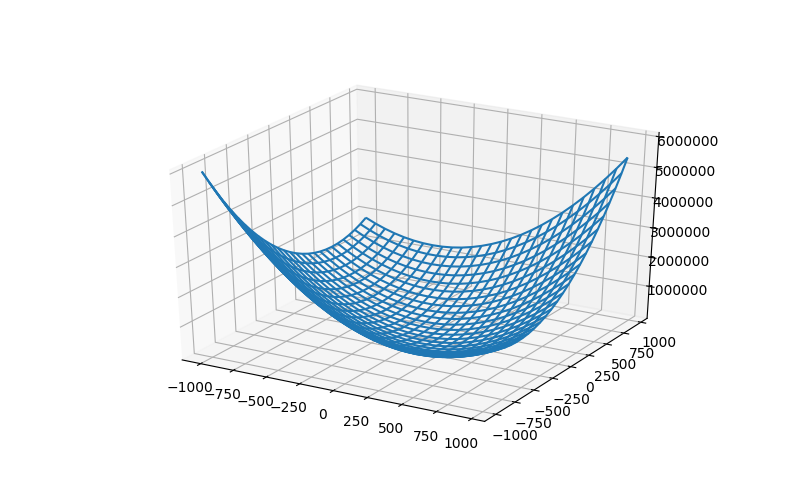

In [13]:
def func(x1, x2):
    return 2 * x1 ** 2 + 2 * x2 ** 2 + 2 * x1 * x2 - 4 * x1 - 6 * x2
    
x0 = np.array([1, 1])
a = -1000
b = 1000

def related_directions(f, x, eps=0.001):
    n = len(x)
    d = np.array([[ int(i == j) for j in range(1, n + 1)] for i in range(n + 1)])
    d[0] = d[n]
    
    y = x
    k = 1
    while True:
        ys = [y]
        
        print(f"Итерация: {k}")
        print ("\t", "y0:", y)
        f
        i = 0
        while i <= n:
            t = zolotogo_secheniya(lambda r: f(*[y[j] + r * d[i][j] for j in range(n)]), a, b, eps)
            y = y + t * d[i]

            ys.append(y)

            print(f"\t y{i + 1}: {y} \t t{i}: {t}")

            if i == n - 1 and np.array_equal(ys[0], y):
                return y

            if i == n and np.array_equal(ys[1], y): 
                return y

            i += 1

        norm = np.linalg.norm(y - x)
        if norm < eps:
            return y
   
        new_d = np.copy(d)
        new_d[0] = new_d[n] = y - ys[1]

        for i in range(1, n):
            new_d[i] = d[i + 1]

        rank = np.linalg.matrix_rank(new_d[1:])
        if rank == n:
            d = new_d
        
        x = y 
        k += 1
    
solve = related_directions(func, (1, 1))
print("\nX_min:", solve, "\t", "F_min:", func(*solve))

x = np.arange(a, b, 75)
y = x
xx, yy = np.meshgrid(x, y)
zz = func(xx, yy)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xx, yy, zz)
plt.show()

# 2.2 Метод случайного поиска с возвратом при неудачном шаге

**Алгоритм**
1. Задать начальную точку $х^0$, коэффициент сжатия $0<\beta<1$, $М$ - максимальное число неудачно выполненных испытаний на текущей итерации, $t_0$ - начальную величину шага, $R$ - минимальную величину шага, $N$ - максимальное число итераций. Положить $k = 0$, $у = 1$.
2. Получить случайный вектор $ \xi ^j=(\xi^j_1, ..., \xi^j_n)^T $ где $\xi ^j_i$ - случайная
величина, равномерно распределенная на интервале $[-1,1] $.
3. Вычислить $y^j=x^k=t_k\frac{\xi^j}{\left \| \xi^j \right \|}$
4. Проверить выполнение условий:
    - если $f(y^j)<f(x^k)$, шаг Удачный. Положить $x^{k+1}=y^j$, $t_{k+1}=t_k$, $k = k + 1$ и проверить условие окончания. Если $k < N$, положить $j = 1$ и перейти к шагу 2. Если $k = N$, поиск завершить: $х^* \cong  х^k$;
    - если $f(y^j)>=f(x^k)$, шаг неудачный и перейти к шагу 5.
5. Оценить число неудачных шагов из текущей точки:
    - если $j < М$ , следует положить $j = j +1$ и перейти к шагу 2;
    - если $j = М$ , проверить условие окончания:
        - если $t_k \leq R$, процесс закончить: $х^* \cong  х^k$, $f(х^*) \cong  f(х^k)$;
        - если $t_k \geq R$, положить $t_k=\beta t_k$, $j=1$ и перейти к шагу 2.


In [14]:
np.random.seed(1709)

def random_search(f, x0, t=0.1, r=0.001, beta=0.5, m=20, n=100):
    x = np.array(x0)
    
    k = 1
    j = 1
    while k < n:
        print(f"Итерация: {k}, попытка: {j}") 
        e = np.random.uniform(-1, 1, x.shape)
        y = x + t * (e / np.linalg.norm(e))
        
        print("\t", "Направление:", e)
        
        print("\t", "f(y):", f(*y), "f(x):", f(*x))
        if f(*y) < f(*x):
            x = y
            k += 1
            print("\t", "Новая точка:", x)
        elif j < m:
            j += 1
            print("\t", "Неудачная попытка")
        elif j >= m:
            if t <= r:
                return x
            else:
                t = beta * t
                j = 1
                print("\t", f"Много неудачных попыток, меняем шаг на {t}")


solve = random_search(func, (1, 1))
print("X_min:", solve, "\t", "F_min:", func(*solve))

Итерация: 1, попытка: 1
	 Направление: [-0.62951848 -0.96216867]
	 f(y): -4.0803366034118715 f(x): -4
	 Новая точка: [0.9452502 0.9163193]
Итерация: 2, попытка: 1
	 Направление: [ 0.73264884 -0.46267768]
	 f(y): -3.909211048269242 f(x): -4.0803366034118715
	 Неудачная попытка
Итерация: 2, попытка: 2
	 Направление: [-0.83739935  0.32234388]
	 f(y): -4.233592155038831 f(x): -4.0803366034118715
	 Новая точка: [0.85192562 0.95224315]
Итерация: 3, попытка: 2
	 Направление: [-0.67003064  0.55198967]
	 f(y): -4.355661091164869 f(x): -4.233592155038831
	 Новая точка: [0.77474388 1.01582758]
Итерация: 4, попытка: 2
	 Направление: [-0.79333085 -0.00978789]
	 f(y): -4.447991158472636 f(x): -4.355661091164869
	 Новая точка: [0.67475149 1.01459391]
Итерация: 5, попытка: 2
	 Направление: [ 0.96449895 -0.711524  ]
	 f(y): -4.343794904143015 f(x): -4.447991158472636
	 Неудачная попытка
Итерация: 5, попытка: 3
	 Направление: [ 0.17668787 -0.16222519]
	 f(y): -4.344269089720781 f(x): -4.447991158472636


	 Неудачная попытка
Итерация: 16, попытка: 7
	 Направление: [0.312064   0.12502619]
	 f(y): -4.6665588620449485 f(x): -4.666660744875734
	 Неудачная попытка
Итерация: 16, попытка: 8
	 Направление: [7.98008353e-01 1.20227339e-04]
	 f(y): -4.66659718633165 f(x): -4.666660744875734
	 Неудачная попытка
Итерация: 16, попытка: 9
	 Направление: [-0.56936902  0.88397017]
	 f(y): -4.666586953026304 f(x): -4.666660744875734
	 Неудачная попытка
Итерация: 16, попытка: 10
	 Направление: [-0.83831426  0.77772753]
	 f(y): -4.666592003704751 f(x): -4.666660744875734
	 Неудачная попытка
Итерация: 16, попытка: 11
	 Направление: [ 0.24137378 -0.55503969]
	 f(y): -4.666642461701784 f(x): -4.666660744875734
	 Неудачная попытка
Итерация: 16, попытка: 12
	 Направление: [ 0.91234885 -0.59442336]
	 f(y): -4.666645723180816 f(x): -4.666660744875734
	 Неудачная попытка
Итерация: 16, попытка: 13
	 Направление: [-0.68232282  0.91977636]
	 f(y): -4.666589021610771 f(x): -4.666660744875734
	 Неудачная попытка
Итерац

# 3.1 Метод градиентного спуска (с постоянным шагом)

**Градиентный спуск** — метод нахождения локального экстремума (минимума или максимума) функции с помощью движения вдоль градиента. Для минимизации функции в направлении градиента используются методы одномерной оптимизации, например, метод золотого сечения. Также можно искать не наилучшую точку в направлении градиента, а какую-либо лучше текущей.

**Алгоритм**
1. Задают начальное приближение и точность расчёта $\vec{x}^0, \varepsilon$
2. Рассчитывают $\vec{x}^{{j+1}}=\vec{x}^{{j}}-\lambda^{{j}}\nabla F\left(\vec{x}^{{j}}\right)$, где $\lambda^{{j}}=\mathrm{argmin}_{\lambda} \,F\left(\vec{x}^{{j}}-\lambda\nabla F\left(\vec{x}^{{j}}\right)\right)$
3. Проверяют условие остановки:
    - Если $\left|\vec{x}^{{j+1}}-\vec{x}^{{j}}\right|>\varepsilon$, $\left|F\left(\vec{x}^{{j+1}}\right)-F\left(\vec{x}^{{j}}\right)\right|>\varepsilon$ или $ \left\| \nabla F\left(\vec{x}^{{j+1}}\right) \right\| > \varepsilon$ (выбирают одно из условий), то $j=j+1$ и переход к шагу 2.
    - Иначе $\vec{x}=\vec{x}^{{j+1}}$ и остановка.

In [23]:
def func_d(x1, x2):
    return np.array([4 * x1 + 2 * x2 - 4, 4 * x2 + 2 * x1 - 6]) 

def gradient(f, fd, x0, h=0.25, eps=0.01):
    x = np.array(x0)
    
    k = 0
    while True:
        print(f"Итерация: {k}") 
        print("\tx:", x)
              
        grad = fd(*x)
        print("\tГрадиент:", grad)
        
        if np.linalg.norm(grad) <= eps:
            return x
        
        x = x - h * grad
        
        k += 1

solve = gradient(func, func_d, (1, 1))
print("\n\nX_min:", solve, "\t", "F_min:", func(*solve))

Итерация: 0
	x: [1 1]
	Градиент: [2 0]
Итерация: 1
	x: [0.5 1. ]
	Градиент: [ 0. -1.]
Итерация: 2
	x: [0.5  1.25]
	Градиент: [0.5 0. ]
Итерация: 3
	x: [0.375 1.25 ]
	Градиент: [ 0.   -0.25]
Итерация: 4
	x: [0.375  1.3125]
	Градиент: [0.125 0.   ]
Итерация: 5
	x: [0.34375 1.3125 ]
	Градиент: [ 0.     -0.0625]
Итерация: 6
	x: [0.34375  1.328125]
	Градиент: [0.03125 0.     ]
Итерация: 7
	x: [0.3359375 1.328125 ]
	Градиент: [ 0.       -0.015625]
Итерация: 8
	x: [0.3359375  1.33203125]
	Градиент: [0.0078125 0.       ]


X_min: [0.3359375  1.33203125] 	 F_min: -4.666656494140625


# 3.2 Метод сопряженных градиентов

**Метод сопряжённых градиентов** — метод нахождения локального экстремума функции на основе информации о её значениях и её градиенте. В случае квадратичной функции в $ {R} ^{n} $ минимум находится не более чем за $ n $  шагов.

**Алгоритм**
1. Задаются начальным приближением и погрешностью: $\vec{x}_0, \varepsilon, k=0$
2. Рассчитывают начальное направление: $j=0,\quad \vec{S}_k^j=-\nabla f(\vec{x}_k),\quad \vec{x}_k^j=\vec{x}_k$
3. $\vec{x}_k^{j+1}=\vec{x}_k^j+\lambda\vec{S}_k^j,\quad \lambda=\arg\min_\lambda f(\vec{x}_k^j+\lambda \vec{S}_k^j),\quad \vec{S}_k^{j+1}=-\nabla f(\vec{x}_k^{j+1})+\omega \vec{S}_k^j,\quad \omega=\frac{||\nabla f(\vec{x}_k^{j+1})||^2}{||\nabla f(\vec{x}_k^{j})||^2}$
    - Если $||\vec{S}_k^{j+1}||<\varepsilon$ или $||\vec{x}_k^{j+1}-\vec{x}_k^j||<\varepsilon$, то $\vec{x}=\vec{x}_k^{j+1}$ и остановка.
    - Иначе
        - если $(j+1)n$, то $j=j+1$ и переход к 3;
        - иначе $\vec{x}_{k+1}=\vec{x}_k^{j+1},\quad k=k+1$ и переход к 2.


In [16]:
def related_gradients(f, fd, x0, max_iter=1e5, eps1=0.001, eps2=0.001):
    x = np.array(x0)
    new_x = np.array(x0)
    grad = None
    new_grad = None
    d = None
    
    twice = False
    
    k = 0
    while True:
        print(f"Итерация: {k}") 
        print("\tx:", x)
        
        grad = new_grad
        new_grad = fd(*x)
        print("\tГрадиент:", new_grad)
        
        if np.linalg.norm(new_grad) < eps1:
            return x
        
        if k >= max_iter:
            return x
        elif k == 0:
            d = - new_grad
        else:
            beta = (np.linalg.norm(new_grad) ** 2) / (np.linalg.norm(grad) ** 2)
            d = - new_grad + beta * d
            
        print("\td:", d)
        
        x = new_x
        t = zolotogo_secheniya(lambda t: f(*(x + t * d)), a, b, eps1)
        new_x = x + t * d
        
        if np.linalg.norm(new_x - x) < eps2 or abs(f(*new_x) - f(*x)) < eps2:
            if twice:
                return new_x
            else:
                twice = True
        else:
            twice = False
        
        k += 1

solve = related_gradients(func, func_d, (1, 1))
print("\n\nX_min:", solve, "\t", "F_min:", func(*solve))

Итерация: 0
	x: [1 1]
	Градиент: [2 0]
	d: [-2  0]
Итерация: 1
	x: [1 1]
	Градиент: [2 0]
	d: [-4.  0.]
Итерация: 2
	x: [0.49995191 1.        ]
	Градиент: [-1.92371423e-04 -1.00009619e+00]
	d: [-1.00000005  1.00009619]
Итерация: 3
	x: [0.50128087 1.        ]
	Градиент: [ 0.00512349 -0.99743825]
	d: [-0.99984146  1.99225185]
Итерация: 4
	x: [0.2501819  1.25112311]
	Градиент: [-0.49702617 -0.49514375]
	d: [0.0023838 1.4807522]
Итерация: 5
	x: [0.20912685 1.33292809]
	Градиент: [-0.49763643 -0.25003394]
	d: [0.49913857 1.18312297]
Итерация: 6
	x: [0.20922887 1.39630571]
	Градиент: [-0.37047308  0.00368059]
	d: [0.59137167 0.51992188]
Итерация: 7
	x: [0.21902297 1.41952094]
	Градиент: [-0.28486626  0.11612968]
	d: [0.69258026 0.24232413]
Итерация: 8
	x: [0.23601272 1.43445798]
	Градиент: [-0.18703314  0.20985738]
	d: [ 0.76534778 -0.00751319]
Итерация: 9
	x: [0.25544993 1.44125879]
	Градиент: [-0.09568268  0.27593503]
	d: [ 0.92179417 -0.28404472]
Итерация: 10
	x: [0.28041453 1.44101372]
	

# 4.1 Метод Ньютона

**Алгоритм**
1. Задать $x^0, \varepsilon_1>0, \varepsilon_2>0, M$ - предельное число итераций. Найти градиент $\bigtriangledown f(x)$ и матрицу Гессе $H(х)$.
2. Положить $k = 0$.
3. Вычислить $\bigtriangledown f(x^k)$.
4. Проверить выполнение критерия окончания $ \left \| \bigtriangledown f(x^k) \right \| \leq \varepsilon_1$:
    - если неравенство выполнено, то расчет окончен и $x^*=x^k$;
    - в противном случае перейти к шагу 5.
5. Проверить выполнение неравенства $k>M$:
    - если неравенство выполнено, расчет окончен и $x^*=x^k$;
    - если нет, перейти к шагу 6.
6. Вычислить матрицу $H(x^k)$.
7. Вычислить матрицу $H^{-1}(x^k)$.
8. Проверить выполнение условия $H^{-1}(x^k) > 0$:
    - если $H^{-1}(x^k) > 0$, то перейти к шагу 9;
    - если нет, то перейти к шагу 10, положив $d^k=- \bigtriangledown f(x^k)$.
9. Определить $d^k=- H^{-1}(x^k) \bigtriangledown f(x^k)$
10. Найти точку $x^{k+1}=x^k+t_k d^k$
11. Проверить выполнение условий , $$ \left \| x^{k+1}-x^{k} \right \| < \varepsilon _2, \: \: \: \: \: | f(x^{k+1})-f(x^{k}) | < \varepsilon _2 $$
    - если оба условия выполнены при текущем значении $k$ и $k = k-1$, то расчет окончен, $x^*=x^{k+1}$;
    - в противном случае положить $k = k +1$ и перейти к шагу 3.


In [17]:
def gessa(x):
    return np.array([[4, 2], 
                     [2, 4]])
 
def newton(f, fd, gessa, x0, eps=0.001):
    x = np.array(x0)
    
    k = 0
    while True:
        print(f"Итерация: {k}")
        print("\tx:", x)
        
        grad = fd(*x)        
        print("\tГрадиент:", grad)
        
        if np.linalg.norm(grad) <= eps:
            return x
        
        x = x - np.linalg.inv(gessa(x)) @ grad        
        print("\tНовое значение x:", x)   
        
        k += 1
        
solve = newton(func, func_d, gessa, (1, 1))
print("\nX_min:", solve, "\t", "F_min:", func(*solve))

Итерация: 0
	x: [1 1]
	Градиент: [2 0]
	Новое значение x: [0.33333333 1.33333333]
Итерация: 1
	x: [0.33333333 1.33333333]
	Градиент: [0. 0.]

X_min: [0.33333333 1.33333333] 	 F_min: -4.666666666666666


# 4.2 Метод Девидона-Флетера-Рафсона

**Алгоритм**
1. Задать $x^0, \varepsilon_1>0, \varepsilon_2>0, M$ - предельное число итераций. Найти градиент $\bigtriangledown f(x)$.
2. Положить $k=0, A^0=E$.
3. Вычислить $\bigtriangledown f(x^k)$.
4. Проверить критерий окончания $ \left \| \bigtriangledown f(x^k) \right \| \leq \varepsilon_1$:
    - если критерий выполнен, то $x^*=x^k$, расчет закончен;
    - если нет, то перейти к шагу 5.
5. Проверить условие $k \geq  М$:
    - если неравенство выполнено, то  $x^*=x^k$ и расчет закончен;
    - если нет, перейти при $k = 0$ к шагу 10, а при $k > 1$ к шагу 6.
6. Вычислить $\Delta g^k=\bigtriangledown f(x^{k+1})-\bigtriangledown f(x^{k})$.
7. Вычислить $\Delta x= x^{k+1}-x^{k}$.
8. Вычислить $$A^k_c=\frac{\Delta x^k(\Delta x^k)^T}{(\Delta x^k)^T\Delta g^k}
- \frac{A^k\Delta g^k(\Delta g^k)^T A^k}{(\Delta g^k)^T A^k \Delta g^k}$$
9. Вычислить $A^{k+1}=A^{k}+A^k_c$.
10. Определить $d^k=-A^k\bigtriangledown f(x^k)$.
11. Вычислить $t^*_k$ из условия $\phi(t_k)=f(x^k-t_k A^k \bigtriangledown f(x^k) ) \rightarrow \underset{t_k}{min}$
12. Вычислить $x^{k+1}=x^k-t^*_k A^k\bigtriangledown f(x^k)$.
13. Проверить условия  $$ \left \| x^{k+1}-x^{k} \right \| < \varepsilon _2, \: \: \: \: \: | f(x^{k+1})-f(x^{k}) | < \varepsilon _2 $$
    - если оба неравенства выполняются в двух последовательных итерациях с номерами $k$ и $k -1$, то расчет окончен и $х^*=x^{k+1}$;
    - в противном случае положить $k = k +1$ и перейти к шагу 3.


In [18]:
def davidon_fletcher_powell(f, fd, x0, max_iter=1e5, eps1=0.001, eps2=0.001):
    x = np.array(x0)
    new_x = np.array(x0)
    grad = None
    new_grad = None
    A = np.eye(len(x0))
    
    twice = False
    
    k = 0
    while True:
        print(f"Итерация: {k}")
        print("x:", x)
        
        grad = new_grad        
        new_grad = fd(*new_x)        
        print("Градиент:", new_grad)
        
        if np.linalg.norm(new_grad) <= eps1:
            return x
        
        if k >= max_iter:
            return new_x
        elif k >= 1:
            g = new_grad - grad
            print("g:", g)
              
            delta_x = new_x - x
            print("delta x:", delta_x)
                        
            A +=(np.matrix(delta_x).T @ np.matrix(delta_x)) / np.dot(delta_x, g) - \
                  (A @ np.matrix(delta_x).T @ np.matrix(delta_x) @ A) / (np.matrix(delta_x) @ A @ np.matrix(delta_x).T)
              
            print("Матрица А:")
            print(A)
        
        x = new_x
        t = zolotogo_secheniya(lambda t: f(*(x - t * A @ new_grad)), a, b, eps1)
        print("t:", t)
              
        new_x = x - t * A @ new_grad
        
        if np.linalg.norm(new_x - x) < eps2 or abs(f(*new_x) - f(*x)) < eps2:
            if twice:
                return new_x
            else:
                twice = True
        else:
            twice = False
             
        print("-" * 50)
        k += 1
        
solve = davidon_fletcher_powell(func, func_d, (1, 1))
print("\nX_min:", solve, "\t", "F_min:", func(*solve))

Итерация: 0
x: [1 1]
Градиент: [2 0]
t: 0.25002404642782494
--------------------------------------------------
Итерация: 1
x: [1 1]
Градиент: [-1.92371423e-04 -1.00009619e+00]
g: [-2.00019237 -1.00009619]
delta x: [-0.50004809  0.        ]
Матрица А:
[[0.25 0.  ]
 [0.   1.  ]]
t: 0.25002404642782494
--------------------------------------------------
Итерация: 2
x: [0.49995191 1.        ]
Градиент: [4.99951916e-01 1.20243704e-04]
g: [0.50014429 1.00021643]
delta x: [1.20243704e-05 2.50048095e-01]
Матрица А:
[[ 2.50000000e-01 -5.78112521e-10]
 [-5.78112521e-10  2.49987979e-01]]
t: 0.9995098929803135
--------------------------------------------------
Итерация: 3
x: [0.49996393 1.2500481 ]
Градиент: [ 1.84940159e-04 -2.49853378e-01]
g: [-0.49976698 -0.24997362]
delta x: [-1.24926722e-01 -3.00444592e-05]
Матрица А:
[[ 2.49939890e-01 -1.15650571e-08]
 [-1.15650571e-08  2.49987979e-01]]
t: 1.0012492900268626
--------------------------------------------------
Итерация: 4
x: [0.37503721 1.25001